In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [6]:
df.shape

(569, 33)

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

diagnosis
B    357
M    212
Name: count, dtype: int64


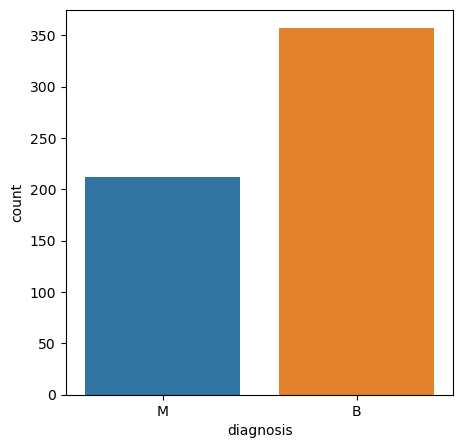

In [8]:
plt.figure(figsize=(5,5)) 
sns.countplot(x=df["diagnosis"]) 
print(df["diagnosis"].value_counts())

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

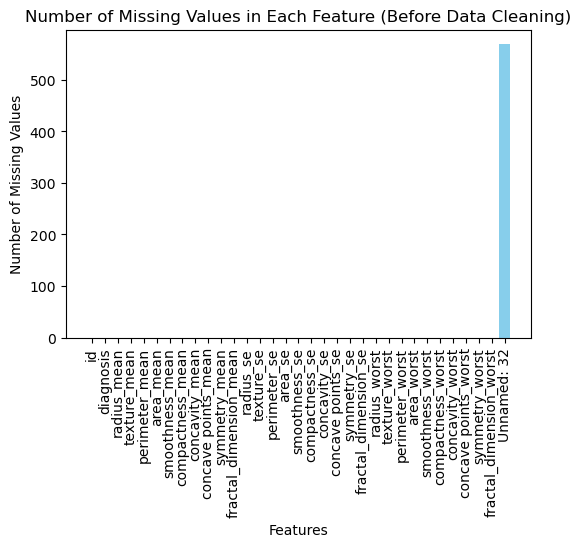

In [10]:
missing_values_count = df.isnull().sum()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.title('Number of Missing Values in Each Feature (Before Data Cleaning)')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
df.shape

(569, 31)

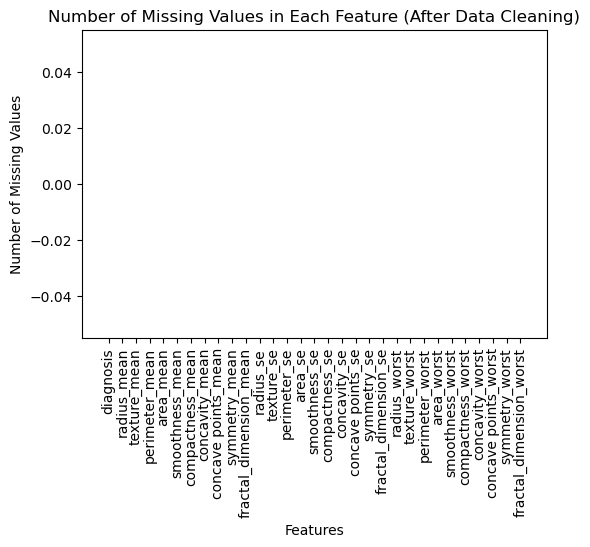

In [13]:
missing_values_count = df.isnull().sum()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.title('Number of Missing Values in Each Feature (After Data Cleaning)')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [14]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
corr



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


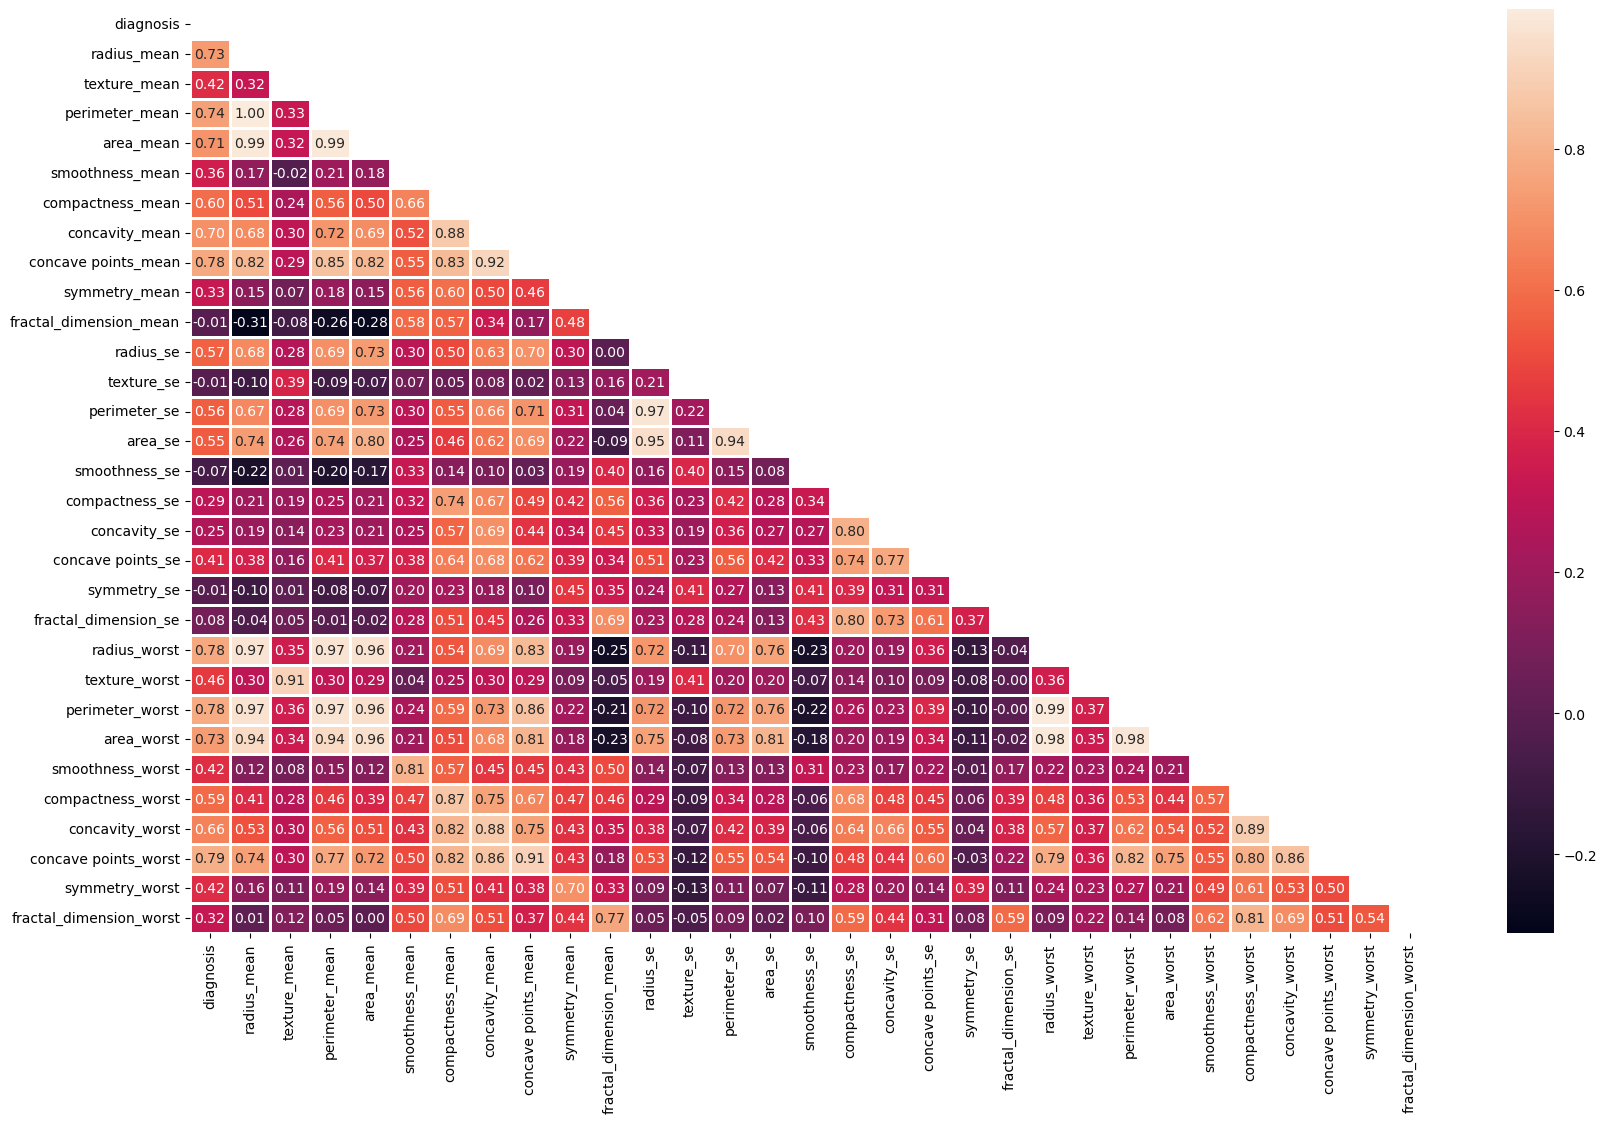

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

h_map=sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()
plt.savefig('correlated_matrix.png', bbox_inches='tight')

In [17]:
df1=df.corr()
mask = np.tri(df1.shape[0], dtype=bool, k=-1)

# Apply the mask to the DataFrame
lower_triangle_values = df1.where(mask)


row_names = lower_triangle_values.index
col_names = lower_triangle_values.columns


print("Row names:", row_names)
print("Column names:", col_names)

Row names: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Column names: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavit

In [18]:
for i in range(df1.shape[0]):
    for j in range(df1.shape[1]):
            value = df1.iloc[i, j]
            if value > 0.9 and value < 1:
                row_name = lower_triangle_values.index[i]
                col_name = lower_triangle_values.columns[j]
                print(f"Value at ({row_name}, {col_name}): {value}")

Value at (radius_mean, perimeter_mean): 0.9978552814938109
Value at (radius_mean, area_mean): 0.9873571700566127
Value at (radius_mean, radius_worst): 0.9695389726112055
Value at (radius_mean, perimeter_worst): 0.9651365139559871
Value at (radius_mean, area_worst): 0.9410824595860461
Value at (texture_mean, texture_worst): 0.912044588840421
Value at (perimeter_mean, radius_mean): 0.9978552814938109
Value at (perimeter_mean, area_mean): 0.9865068039913907
Value at (perimeter_mean, radius_worst): 0.9694763634663146
Value at (perimeter_mean, perimeter_worst): 0.9703868870426394
Value at (perimeter_mean, area_worst): 0.9415498080023068
Value at (area_mean, radius_mean): 0.9873571700566127
Value at (area_mean, perimeter_mean): 0.9865068039913907
Value at (area_mean, radius_worst): 0.9627460860470841
Value at (area_mean, perimeter_worst): 0.9591195743552645
Value at (area_mean, area_worst): 0.9592133256498998
Value at (concavity_mean, concave points_mean): 0.9213910263788588
Value at (concav

In [19]:
correlation_matrix = df.corr()
mask = np.tri(correlation_matrix.shape[0], dtype=bool, k=-1)
lower_triangle_values = correlation_matrix.where(mask)
rows_to_drop = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        value = lower_triangle_values.iloc[i, j]
        if not pd.isna(value) and value > 0.9:
            rows_to_drop.append(correlation_matrix.index[i])

In [20]:
rows_to_drop

['perimeter_mean',
 'area_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'area_se',
 'radius_worst',
 'radius_worst',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'perimeter_worst',
 'perimeter_worst',
 'perimeter_worst',
 'area_worst',
 'area_worst',
 'area_worst',
 'area_worst',
 'area_worst',
 'concave points_worst']

In [21]:
unique_list = list(set(rows_to_drop))

In [22]:
unique_list

['radius_worst',
 'texture_worst',
 'concave points_mean',
 'perimeter_mean',
 'perimeter_se',
 'concave points_worst',
 'area_mean',
 'perimeter_worst',
 'area_worst',
 'area_se']

In [23]:
df=df.drop(columns=unique_list)

In [24]:
df.shape

(569, 21)

In [25]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

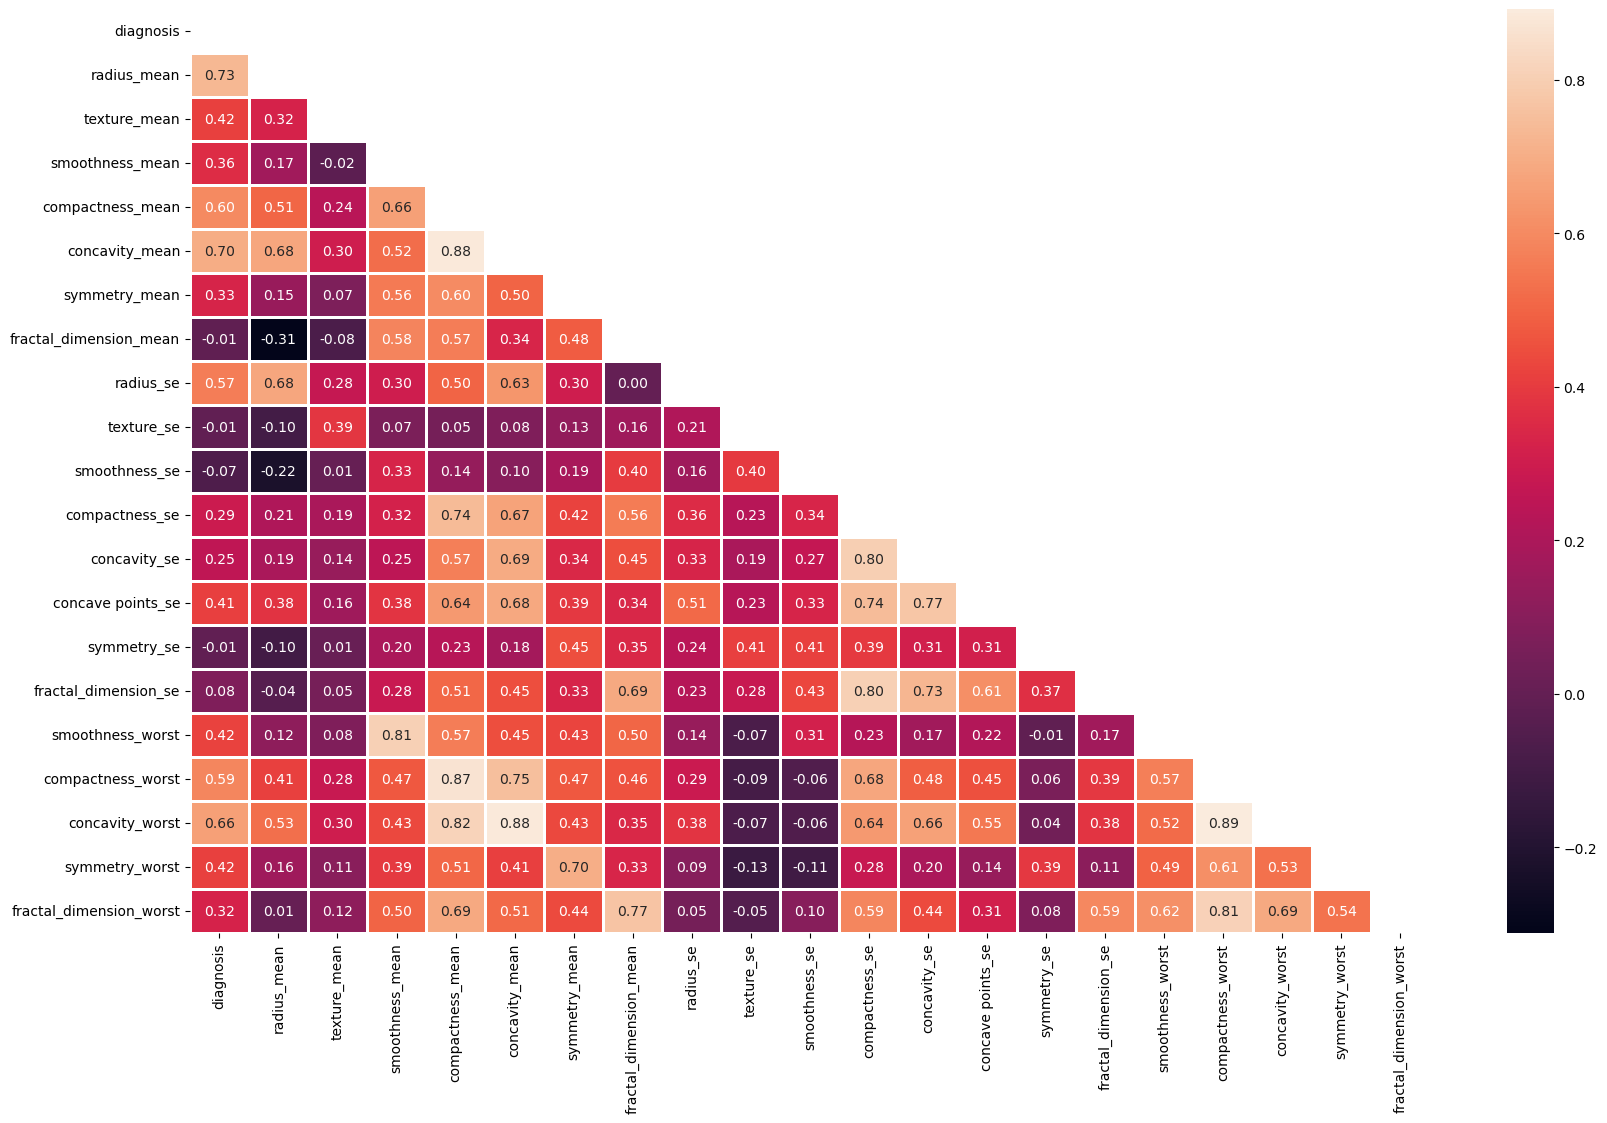

In [26]:
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [27]:
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

Text(0, 0.5, 'Count')

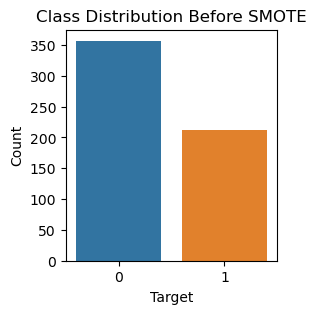

In [28]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [31]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

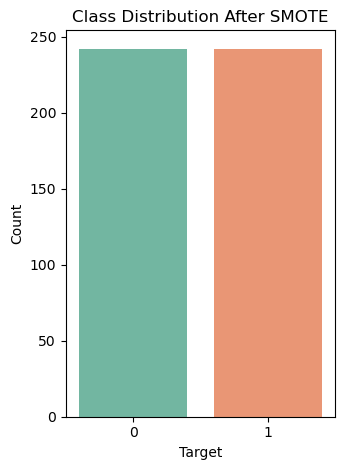

In [32]:
# Visualize class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

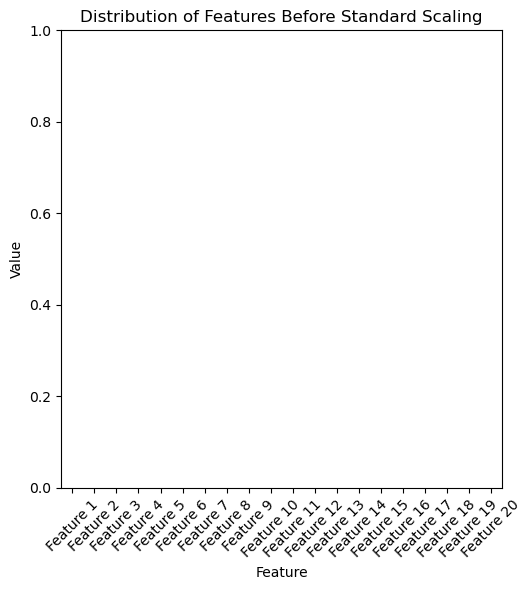

In [33]:
df_train = pd.DataFrame(X_train, columns=[f'Feature {i+1}' for i in range(X_train.shape[1])])
df_test = pd.DataFrame(X_test, columns=[f'Feature {i+1}' for i in range(X_test.shape[1])])


# Melt the DataFrames for violin plot
df_train_melt = df_train.melt(var_name='Feature', value_name='Value')
df_test_melt = df_test.melt(var_name='Feature', value_name='Value')

# Create violin plots for before and after standard scaling
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Feature', y='Value', data=df_train_melt, inner='quartile', palette='Set1')
plt.title('Distribution of Features Before Standard Scaling')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

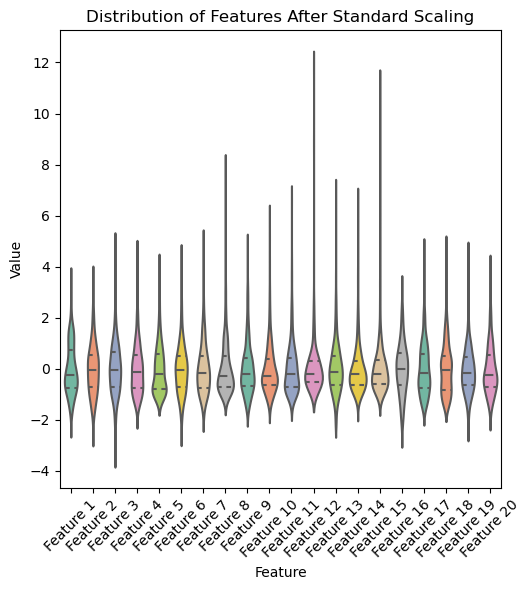

In [35]:

df_train_scaled = pd.DataFrame(X_train, columns=[f'Feature {i+1}' for i in range(X_train.shape[1])])
df_test_scaled = pd.DataFrame(X_test, columns=[f'Feature {i+1}' for i in range(X_test.shape[1])])



df_train_scaled_melt = df_train_scaled.melt(var_name='Feature', value_name='Value')
df_test_scaled_melt = df_test_scaled.melt(var_name='Feature', value_name='Value')

# Create violin plots for before and after standard scaling
plt.figure(figsize=(10, 6))



plt.subplot(1, 2, 2)
sns.violinplot(x='Feature', y='Value', data=df_train_scaled_melt, inner='quartile', palette='Set2')
plt.title('Distribution of Features After Standard Scaling')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

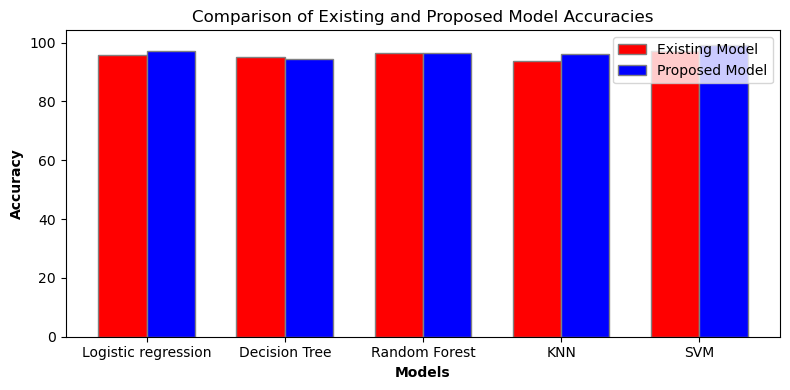

In [36]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']

# Testing accuracies
testing_accuracies = [97.3, 94.3, 96.5, 96,99.2]

# Existing model accuracies
existing_accuracies = [95.8, 95.1, 96.5, 93.7, 97.2]

bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(8, 4))

plt.bar(r1, existing_accuracies, color='r', width=bar_width, edgecolor='grey', label='Existing Model')
plt.bar(r2, testing_accuracies, color='b', width=bar_width, edgecolor='grey', label='Proposed Model')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Existing and Proposed Model Accuracies')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=30)
model1=lr.fit(X_train, y_train)
train_prediction1=model1.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,train_prediction1)

0.981404958677686

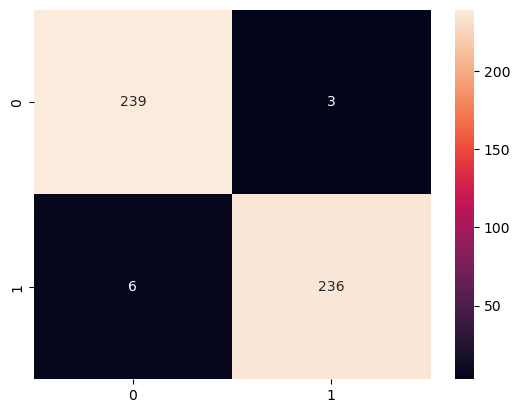

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_prediction1)
cm

sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [40]:
test_prediction1=model1.predict(X_test)

In [41]:
accuracy_score(y_test,test_prediction1)

0.9739130434782609

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,test_prediction1)
cm
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives

# Calculate Precision
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 0.9658119658119658


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.97      0.98      0.97       115

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230



In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, random_state =40)
model2=dtc.fit(X_train, y_train)
train_prediction2=model2.predict(X_train)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,train_prediction2)

0.9545454545454546

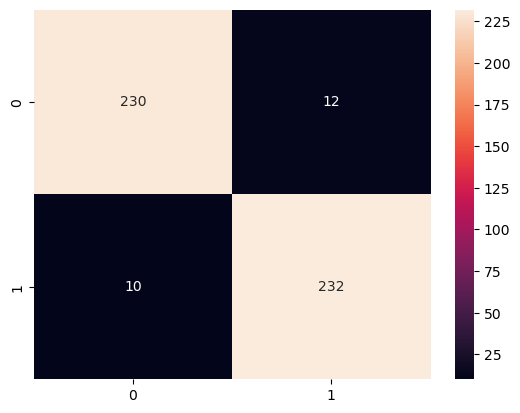

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_prediction2)
cm
sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [47]:
test_prediction2=model2.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_prediction2)

0.9434782608695652

In [49]:
cm=confusion_matrix(y_test,test_prediction2)
cm
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives

# Calculate Precision
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 0.9322033898305084


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       115
           1       0.93      0.96      0.94       115

    accuracy                           0.94       230
   macro avg       0.94      0.94      0.94       230
weighted avg       0.94      0.94      0.94       230



In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators =50,criterion = 'entropy', random_state = 40, min_samples_split=10)
model3 = rfc.fit(X_train, y_train)
train_prediction3 = model3.predict(X_train)

In [52]:
accuracy_score(y_train,train_prediction3)

0.9917355371900827

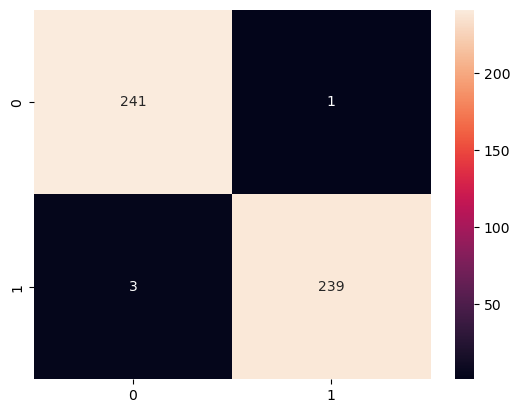

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_prediction3)
cm
sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [54]:
test_prediction3=model3.predict(X_test)
accuracy_score(y_test,test_prediction3)

0.9652173913043478

In [55]:
cm=confusion_matrix(y_test,test_prediction3)
cm
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives

# Calculate Precision
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 0.9652173913043478


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.97      0.97      0.97       115

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230



In [57]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
train_prediction4=knn_model.predict(X_train)

In [58]:
accuracy_score(y_train,train_prediction4)

0.96900826446281

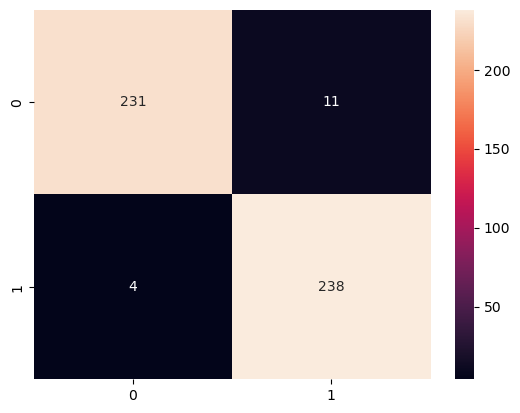

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_prediction4)
cm
sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [60]:
test_prediction4=knn_model.predict(X_test)
accuracy_score(y_test,test_prediction4)

0.9608695652173913

In [61]:
cm=confusion_matrix(y_test,test_prediction4)
cm
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives

# Calculate Precision
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 0.9568965517241379


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction4))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       115
           1       0.96      0.97      0.96       115

    accuracy                           0.96       230
   macro avg       0.96      0.96      0.96       230
weighted avg       0.96      0.96      0.96       230



In [63]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=0.4, random_state=42, probability=True)
clf.fit(X_train, y_train)
train_prediction5 = clf.predict(X_train)

In [64]:
accuracy_score(y_train, train_prediction5)

0.9710743801652892

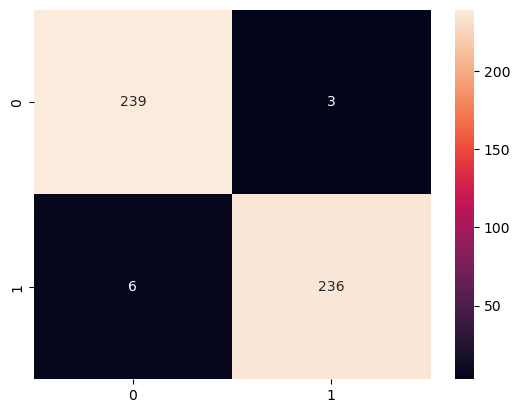

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_prediction1)
cm
sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [66]:
test_prediction5=clf.predict(X_test)
accuracy_score(y_test, test_prediction5)

0.991304347826087

In [67]:
cm=confusion_matrix(y_test,test_prediction5)
cm

tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives

# Calculate Precision
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 1.0


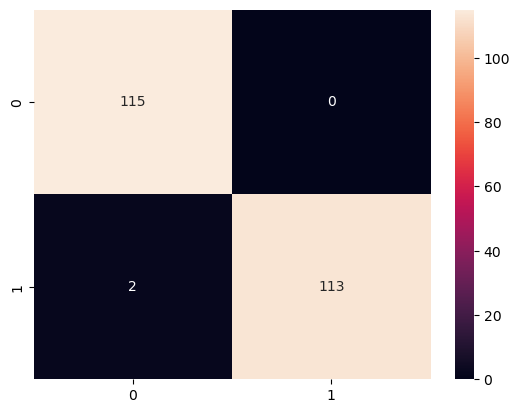

In [68]:
sns.heatmap(cm,annot=True,fmt='g')
plt.savefig('h.png')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_prediction5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       115
           1       1.00      0.98      0.99       115

    accuracy                           0.99       230
   macro avg       0.99      0.99      0.99       230
weighted avg       0.99      0.99      0.99       230



In [70]:
import pickle
pickle.dump(clf, open('model_svc.pkl', 'wb'))

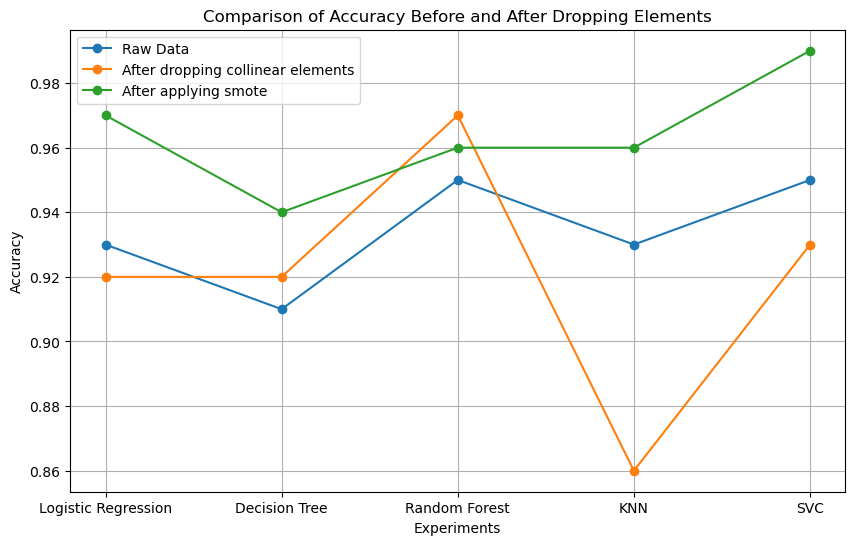

In [71]:
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']
raw = [0.93, 0.91, 0.95, 0.93, 0.95]
dropped = [0.92, 0.92, 0.97, 0.86, 0.93]
smote = [0.97, 0.94, 0.96, 0.96, 0.99]


plt.figure(figsize=(10, 6))
plt.plot(labels, raw, marker='o', label='Raw Data')
plt.plot(labels, dropped, marker='o', label='After dropping collinear elements')
plt.plot(labels, smote, marker='o', label='After applying smote')


# Adding labels and title
plt.xlabel('Experiments')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Before and After Dropping Elements')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

LogisticRegression: AUC = 0.99
DecisionTreeClassifier: AUC = 0.97
RandomForestClassifier: AUC = 0.99
KNeighborsClassifier: AUC = 0.98
SVC: AUC = 1.00


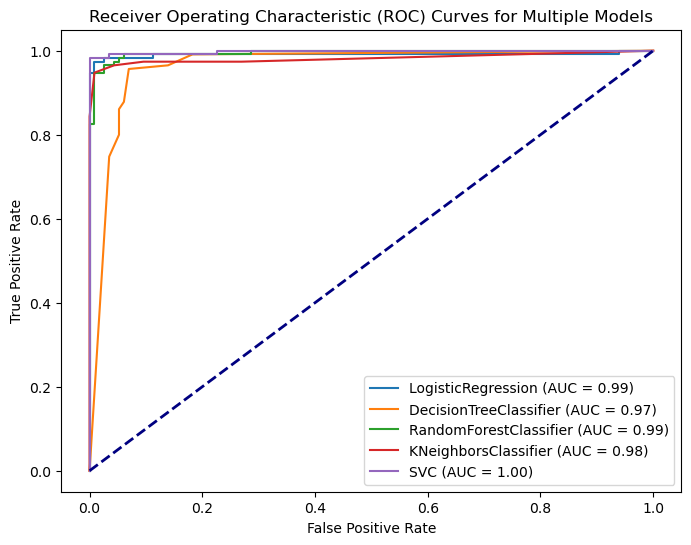

<Figure size 640x480 with 0 Axes>

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
models = [
   model1,model2,model3,knn_model,clf
]
plt.figure(figsize=(8, 6))

for model in models:
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(type(model).__name__, roc_auc))
    print('{}: AUC = {:.2f}'.format(type(model).__name__, roc_auc))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()
plt.savefig('auc.png',bbox_inches='tight',dpi=300)

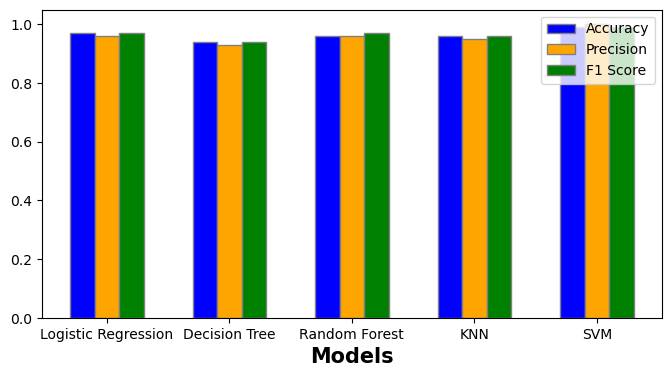

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Accuracy': [0.97, 0.94, 0.96, 0.96, 0.99],
    'Precision': [0.96, 0.93, 0.96, 0.95, 1.0],
    'F1 Score': [0.97, 0.94, 0.97, 0.96, 0.99]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Bar width
bar_width = 0.2

# Positions of bars on X-axis
r1 = range(len(df['Model']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting bars for Accuracy, Precision, and F1 Score
plt.bar(r1, df['Accuracy'], color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, df['Precision'], color='orange', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, df['F1 Score'], color='green', width=bar_width, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(df['Model']))], df['Model'])

# Adding legend
plt.legend()

# Show the plot
plt.show()
